In [1]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install seaborn

     |████████████████████████████████| 215 kB 694 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


# Atividade PCA-LDA aplicado à visão computacional

## Utilize a base MNIST ou LFW para entender como PCA e LDA podem ser utilizados como features para reconhecimento de caracteres manuscritos

## Nota: Caso deseje trabalhar com reconhecimento de faces ao invés de reconhecimento de caracteres manuscritos, pode-se utilizar a base LFW
## faces = [sklearn.datasets] fetch_lfw_people(min_faces_per_person=60)

In [119]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets import fetch_openml

## 1. Carregue a base LFW

In [148]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## 2. PCA 
## Aplique PCA avaliando o número de componentes necessários 
## Visualize as imagens associadas com os primeiros componentes

In [151]:
pca = PCA(n_components = 30)
X_train_pca = pca.fit_transform(X_train, y_train)
pca.explained_variance_ratio_

array([0.09747258, 0.07171133, 0.06165926, 0.05418112, 0.04859922,
       0.04303424, 0.03290366, 0.02885822, 0.02752979, 0.02343808,
       0.02105848, 0.02038369, 0.01700937, 0.01693834, 0.01579978,
       0.01484177, 0.01326398, 0.01271991, 0.01188395, 0.01156287,
       0.01068931, 0.01006766, 0.00957435, 0.00908857, 0.00888142,
       0.00839434, 0.00810974, 0.00788074, 0.0073777 , 0.0069209 ])

In [152]:
X_test_pca = pca.transform(X_test)

In [153]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize = (10, 4),
                             subplot_kw = {'xticks':[], 'yticks':[]},
                             gridspec_kw = dict(hspace = 0.1, wspace = 0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(28, 28),
                  cmap = 'RdPu', interpolation = 'nearest',
                  clim = (0, 16))

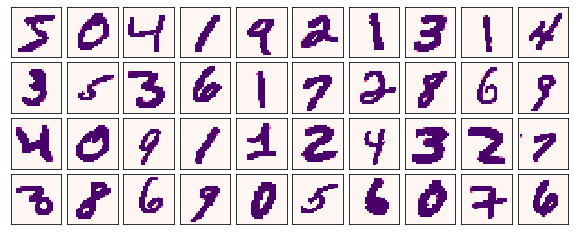

In [154]:
plot_digits(X)

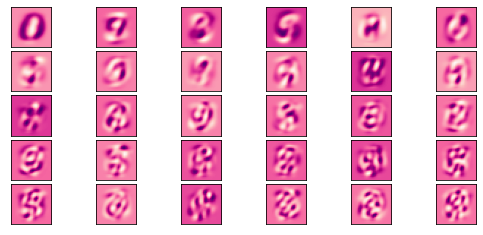

In [155]:
fig, axes = plt.subplots(5,6 , figsize = (9, 4),
                         subplot_kw = {'xticks':[], 'yticks':[]},
                         gridspec_kw = dict(hspace = 0.1, wspace = 0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(28, 28), cmap = 'RdPu')

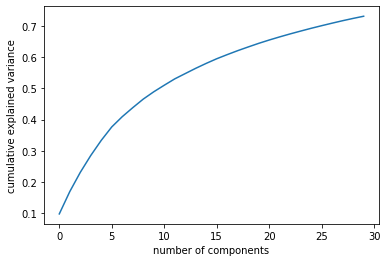

In [156]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

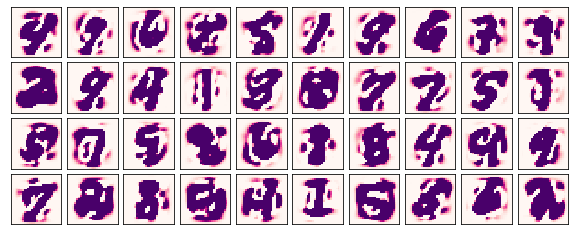

In [157]:
filtered = pca.inverse_transform(X_train_pca)
plot_digits(filtered)

## 3. LDA
## Aplique LDA nos dados originais 
## Exiba a projeção dos dados nos Discriminantes Lineares 
## Exiba a taxa de variância acumulada

In [158]:
lda = LDA(n_components = 5)

In [159]:
X_train_lda = lda.fit_transform(X_train, y_train)

In [160]:
X_test_lda = lda.transform(X_test)

In [161]:
y_pred = lda.predict(X_test)

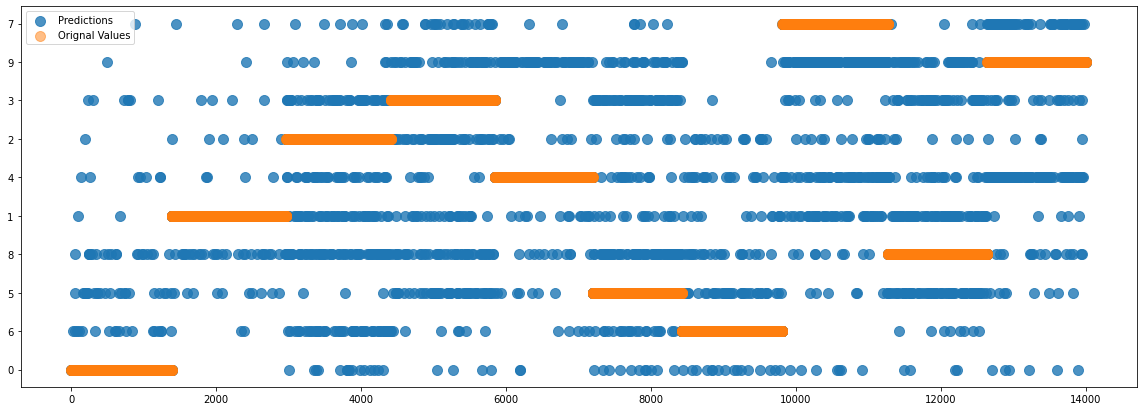

In [162]:
plt.figure(figsize=(20,7))
idx = np.argsort(y_test)
plt.rcParams['axes.facecolor'] = 'w'

plt.scatter(range(len(y_test)), y_pred[idx],label="Predictions",s=100,alpha=0.8)
plt.scatter(range(len(y_test)), y_test[idx],label="Orignal Values",s=100,alpha=0.5)
plt.legend()

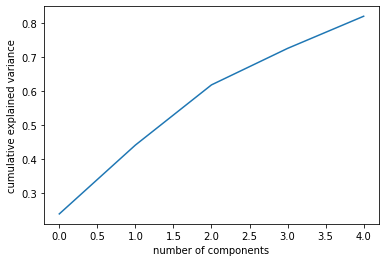

In [163]:
plt.plot(np.cumsum(lda.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## 4. Classificador
## Aplique um classificador de sua escolha nas features obtidas por LDA e PCA
## Compare os dois métodos e resultados

In [164]:
classifier_pca = RandomForestClassifier(max_depth = 6, random_state = 0)

classifier_pca.fit(X_train_pca, y_train)
y_pred = classifier_pca.predict(X_test_pca)

In [165]:
cm_pca = confusion_matrix(y_test, y_pred)
print(cm_pca)
print()
print('Accuracy', accuracy_score(y_test, y_pred))

[[1222    0   15   52    6   22   30   15   18    7]
 [   2 1509   21   20    1   11    3    0   13    0]
 [  18   13 1155   72   28    5   20   10  111   11]
 [   7    8   34 1220    5   29   10   17   84   21]
 [   4   14   23   15 1111    6   17   13   32  115]
 [  27    6   47  157   29  837   29   17   48   34]
 [  19   11   53   12   11   24 1251    1    4    1]
 [   6   46   28   16   15   10    0 1249   56   32]
 [  11   19   39  118   18   29   12   13 1051   58]
 [   5   15   11   31  109   24    5   82   39 1040]]

Accuracy 0.8317857142857142


In [166]:
classifier_lda = RandomForestClassifier(max_depth = 6, random_state = 0)

classifier_lda.fit(X_train_lda, y_train)
y_pred = classifier_lda.predict(X_test_lda)

In [167]:
cm_lda = confusion_matrix(y_test, y_pred)
print(cm_lda)
print()
print('Accuracy', accuracy_score(y_test, y_pred))

[[1302    0    5    5    2   53   13    0    6    1]
 [   0 1465   16    3    2    3    1    6   73   11]
 [  12   14 1204   73   15   32   28    7   49    9]
 [   3    2  110 1024    2   86    1   40  130   37]
 [   5    1   11    1 1111   49   14    1   28  129]
 [  16    7   24  102    2  829   17   10  194   30]
 [  20    1   18    4    7   37 1272    0   27    1]
 [  15    9   22    3   20    8    0 1211    9  161]
 [  11   50   13  115   12  269   13    9  822   54]
 [  19    0    6    6  124   46    1   49   13 1097]]

Accuracy 0.8097857142857143


In [ ]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=2)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)